In [2]:
%matplotlib notebook
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
N = 100
freq = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]
def me(x, k):
    m_k = 0
    for i in range(len(x)):
        m_k += (i**k)*x[i]/sum(x)
    return m_k
    
theta1 = me(freq, 1)
print("theta1 =", "%.3f" % theta1)

theta2 = (me(freq, 2) - theta1**2)**(1/2)
print("theta2 =", "%.3f" % theta2)

theta1 = 4.770
theta2 = 2.505


In [4]:
def sup(z, mz_1, mz_2):
    l = len(freq)
    w = np.zeros((l))
    
    ecdf = sm.distributions.ECDF(z)
    u = ecdf(np.array(range(l)))
    v = stats.norm.cdf(np.array(range(l)), mz_1, mz_2)
    
    w[0] = np.max((v[0], np.abs(v[0] - u[0])))
    
    for i in range(1, len(freq)):
        w[i] = abs(max([v[i]-u[i], v[i]-u[i-1]], key=abs))
    return np.max(w)



In [6]:
M = 10000

D = np.zeros(M)
s = np.zeros([M,N])
s1 = np.zeros([M,len(freq)])

for i in range(M):
    for j in range(N):
        a = np.random.uniform()
        k = int(np.round(stats.norm.ppf(a, theta1, theta2)))
        if (k <= -1):
            s[i][j] = 0
            s1[i][0] += 1
        elif (k >= 10):
            s[i][j] = 9
            s1[i][9] += 1
        else:
            s[i][j] = k
            s1[i][k] += 1
            
    mD_1 = me(s1[i], 1)
    mD_2 = (me(s1[i], 2) - mD_1**2)**(1/2)
    
    D[i] = sup(s[i], mD_1, mD_2)   
D = np.sort(D)   
r1 = []

for i in range(len(freq)):
    for j in range(freq[i]):
        r1.append(i)
        
d = sup(r1, theta1, theta2)
p_value = 0

for i in range(M):
    if (D[i] > d):
        p_value = 1 - i/M
        break
        
print("\n p_value =", p_value)


 p_value = 0.8458


<IPython.core.display.Javascript object>


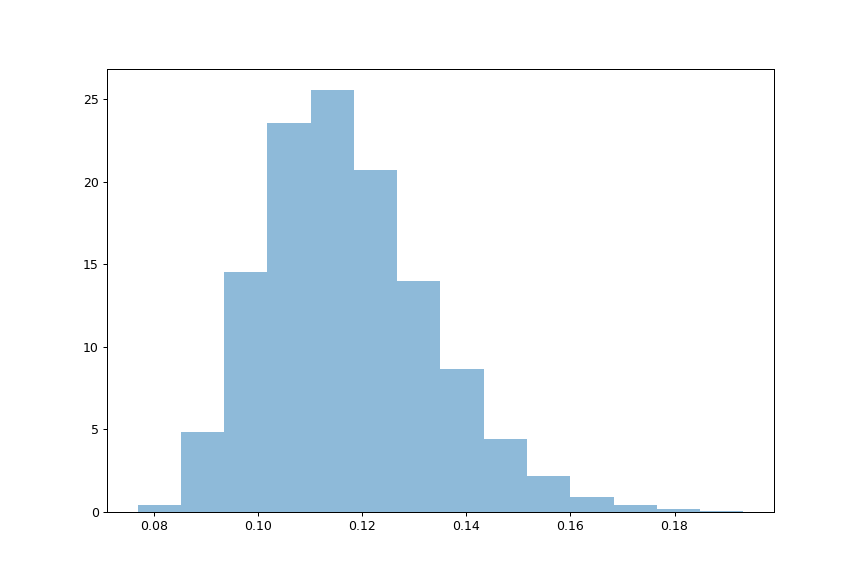

In [7]:
n, bins, patches = plt.hist(D, 1 + int(np.floor(np.log2(M))), density = 1, alpha = 0.5)
plt.show()